# Feature Engineering:
- Splitting data into train and test set with stratified sampling tecnique to preserve distributions found in the housing data
- Creation of an advanced custom transformation pipeline with helpfull tools such as: median imputer, log normalization, custom column modifiers, rare category handler, NaN dropper, categoric variable encoder and variables scaler. (to clean and transform in a fast way future raw sets)



Note: I could have used ScikitLearn tools such as imputer or Ordinal Encoder, however to add more value to the project and have more control I defined my own cleaning functions

In [19]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)


#LOADING CSV
pd.pandas.set_option ("display.max_columns", None)
import pathlib
pathlib.Path.cwd()
path = pathlib.Path.cwd() / 'raw set' / 'raw_data.csv'
raw_data = pd.read_csv(path)
raw_data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# Splitting Data 

# Stratified Sampling

With respect Sale Price

Distibucion
1.0     0.003425
2.0     0.080479
3.0     0.339897
4.0     0.283390
5.0     0.143836
6.0     0.070205
7.0     0.041952
8.0     0.017979
9.0     0.009418
10.0    0.009418
Name: strat_cat, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,y level,strat_cat
94,95,60,RL,69.0,9337,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,No,GLQ,648,Unf,0,176,824,GasA,Ex,Y,SBrkr,905,881,0,1786,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1997.0,RFn,2,684,TA,TA,Y,0,162,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,204750,204750,5.0
1413,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,366.0,Gd,TA,PConc,Gd,Gd,No,GLQ,976,Unf,0,868,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,1,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,620,TA,TA,Y,165,44,0,0,0,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000,257000,6.0
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000,145000,3.0
73,74,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1954,2003,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,104.0,TA,TA,CBlock,TA,TA,No,ALQ,320,BLQ,362,404,1086,GasA,Gd,Y,SBrkr,1086,0,0,1086,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1989.0,Unf,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,144900,144900,3.0
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495,Rec,215,354,1064,GasA,Gd,Y,SBrkr,1064,703,0,1767,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,RFn,2,504,Gd,TA,Y,441,35,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000,239000,5.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,181500,4.0
1332,1333,20,RL,67.0,8877,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,4,6,1938,1958,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,690,Unf,0,126,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,3,Typ,1,Gd,Detchd,1958.0,Unf,1,288,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,100000,100000,2.0
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000,625000,10.0
425,426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1946,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,651,651,GasA,Gd,Y,SBrkr,707,682,0,1389,0,0,1,1,3,1,TA,6,Typ,2,Gd,Detchd,1947.0,Unf,1,240,TA,TA,P,0,0,126,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,135000,135000,3.0
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,N

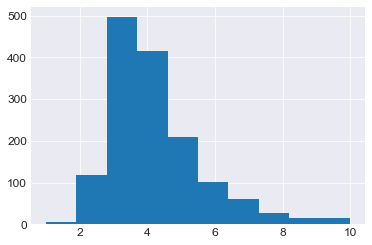

In [20]:
#The following code creates a category attribute by dividing the Sale Price b
#by 50,0000, and then merging all the categories greater than 10 into category 10:
data= raw_data.copy()
data["y level"] = data["SalePrice"]
# Divide by 1.5 to limit the number of income categories
data["strat_cat"] = np.ceil(data["y level"] / 50000)
# Label those above 5 as 5
data["strat_cat"].where(data["strat_cat"] < 10, 10.0, inplace=True)

#plotting
data["strat_cat"].value_counts()
plt.style.use('seaborn-dark')
data["strat_cat"].hist()


# stratified sampling based on the income category. 
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["strat_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
print("Distibucion")
print(strat_train_set["strat_cat"].value_counts().sort_index() / len(strat_train_set))

strat_test_set.head(50)


In [21]:
#Verify proportions in data

from sklearn.model_selection import train_test_split
def proportions(data):
    return data["strat_cat"].value_counts() / len(data)


compare_props = pd.DataFrame({
    
    "Stratified": proportions(strat_test_set),
    
}).sort_index()

compare_props




,Stratified
1.0,0.003425
2.0,0.082192
3.0,0.339041
4.0,0.284247
5.0,0.143836
6.0,0.068493
7.0,0.041096
8.0,0.017123
9.0,0.010274
10.0,0.010274


In [22]:
#Droppoing Sstrat column
for set_ in (strat_train_set, strat_test_set):
    set_.drop(["strat_cat", "y level"], axis=1, inplace=True)


In [23]:
#SAVE to csv


import pathlib
pathlib.Path.cwd()

path = pathlib.Path.cwd() / 'process sets' / 'train_set.csv'
strat_train_set.to_csv(path,index_label= False )

path = pathlib.Path.cwd() / 'process sets' / 'test_set.csv'
strat_test_set.to_csv(path, index_label= False)

strat_train_set.head(50)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1377,1378,50,RL,60.0,10998,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,5,1941,1960,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,408,BLQ,420,156,984,GasA,Ex,Y,SBrkr,984,620,0,1604,0,0,2,0,3,1,TA,6,Min2,0,NaN,Detchd,1977.0,Unf,2,660,TA,TA,Y,0,68,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,117000
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,5,7,1940,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,351,Rec,181,112,644,GasA,Gd,Y,SBrkr,808,547,0,1355,1,0,2,0,4,2,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
67,68,20,RL,72.0,10665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,167.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1013,Unf,0,440,1453,GasA,Ex,Y,SBrkr,1479,0,0,1479,1,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2003.0,RFn,2,558,TA,TA,Y,144,29,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,226000
806,807,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1967,1967,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Av,ALQ,400,Rec,480,100,980,GasA,Gd,Y,SBrkr,980,0,0,980,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1967.0,Fin,1,384,TA,TA,Y,68,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
818,819,80,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,SLvl,6,7,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,80.0,TA,TA,CBlock,TA,TA,Av,GLQ,504,Unf,0,506,1010,GasA,Gd,Y,SBrkr,1052,0,0,1052,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1971.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,155000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
60,61,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,941,Unf,0,217,1158,GasA,Ex,Y,SBrkr,1158,0,0,1158,1,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,2006.0,Unf,2,576,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,158000
147,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,646,Unf,0,468,1114,GasA,Ex,Y,SBrkr,1114,0,0,1114,1,0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2004.0,Unf,2,576,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000
489,490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,8,1970,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,515,Unf,0,115,630

In [24]:
#Loading
dataset=  strat_train_set.copy()

#Declaring x and y (independent and dependent features)
x = dataset.drop("SalePrice", axis=1)
y_label = dataset["SalePrice"].copy()
x




#Selecting num features
num_features = [features for features in x.columns if x[features].dtypes != "O"]
num_values = x[num_features]

#selecting categorical features
cat_features = [features for features in x.columns if x[features].dtypes == "O"]
#selecting time features
year_features = [ feature for feature in num_features if "Yr" in feature or "Year" in feature]
#Selecting discrete features
dis_features = [feature for feature in num_features if len(dataset[feature].unique())< 25 and feature not in year_features + ["Id"]]
#Selecting continous features
con_features = [feature for feature in num_features if len(dataset[feature].unique()) and feature not in dis_features+year_features + ["Id"]]

# Outlier removal

I decide not to remove outliers in this ocassion since all data prices are not errors of measurement

Outliers should be removed only if there are errors in a measurement

In [25]:
df =  strat_train_set.copy()
#Calculate Outliers
Q1 = df["SalePrice"].quantile(.25)
Q3 = df["SalePrice"].quantile(.75)
IQR = Q3 - Q1
UpperLimit = Q3 + (1.5 * IQR)
DownLimit = Q1 - (1.5 * IQR)
print("Max price", df["SalePrice"].max())
print("Min price", df["SalePrice"].min())

print("Upper Limit should be", UpperLimit)
print("Lower Limit should be", DownLimit)


#Regularizing outliers  as 350,000
#df.loc[df["SalePrice"] > 350000 ,  "Totali5"] = 350000




Max price 755000
Min price 34900
Upper Limit should be 342312.5
Lower Limit should be 2612.5


# Data transformation pipeline


# Numerical Variables Cleaning
- Missing data handling (imputer)
- Log Normalization of skewed features
- Custom transformation (if required, for example year substraction to obtain new features)

We will use manual defined functions for transformation in this section (DataframeFunctionTransformer)

# Defining missing data handling function (replacing with median)

In [26]:
#numeric features with NaN
num_nan= [feature for feature in x.columns if x[feature].isnull().sum()>1 and x[feature].dtypes != "O"]

#defining median imputer function
def median(input_df):
    if isinstance(input_df, pd.DataFrame):
        pass
    else: 
        input_df = pd.DataFrame(input_df, columns=(xtot.columns))

    
    
    for feature in num_nan:
        median= input_df[feature].median()
        
        input_df[feature].fillna(median, inplace=True)
        
    return input_df








# Defining year substraction function (replacing with YrSold - feature)


caso modificar columnas

In [27]:
#Defining year substraction function
def yearchange(input_df):
    if isinstance(input_df, pd.DataFrame):
        pass
    else: 
        input_df = pd.DataFrame(input_df, columns=(xtot.columns))

    #Editing input df feature values
    input_df["YearBuilt"] = input_df["YrSold"] - input_df["YearBuilt"]
    input_df["GarageYrBlt"] = input_df["YrSold"] - input_df["GarageYrBlt"]
    input_df["YearRemodAdd"] = input_df["YrSold"] - input_df["YearRemodAdd"]
    return input_df




# Defining Log custom transform function

In [28]:
#Defining logaritmic transformation
def logvar(input_df):
    if isinstance(input_df, pd.DataFrame):
        pass
    else: 
        input_df = pd.DataFrame(input_df, columns=(xtot.columns))

    
    
    #Selecting just continous features
    for feature in con_features:
    
    #If variable contains a 0 skip
        if 0 in input_df[feature].unique():
            pass
        else: 
            input_df[feature]=np.log(input_df[feature])
            
    
    return input_df


# Categorical Variables Cleaning
- missing data handling (imputer)
- rare variables handling (replace low count labels with a "rare" label)
- Encoding categorical variables (One hot or label encoding)

# Defining missing categorical data handling function

In [29]:
#Selecting categorical features with NaN
features_nan= [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == "O"]
def missing(input_df):
    if isinstance(input_df, pd.DataFrame):
        pass
    else: 
        input_df = pd.DataFrame(input_df, columns=(xtot.columns))

    #Replace NaN with "Missing" label
    input_df[features_nan]= input_df[features_nan].fillna("Missing")
    return input_df



# Defining rare categories function

In [30]:


def rare(input_df):
    if isinstance(input_df, pd.DataFrame):
        pass
    else: 
        input_df = pd.DataFrame(input_df, columns=(xtot.columns))

    
    for feature in cat_features:
        #Counting number of ocurrence
        temp=input_df.groupby(feature)["GrLivArea"].count()/len(input_df)
        #Getting labels with more than 1% ocurrence
        temp_df=temp[temp>.01].index
        #Replacing lower than 1% labels with "Rare_var"
        input_df[feature] = np.where(input_df[feature].isin(temp_df),input_df[feature],"Rare_var")
        
        
    return input_df


# NaN dropper function definition

In [31]:
def drop(input_df):
    #Drop every NaN found at this level of the pipeline
    input_df.dropna(inplace=True)

    
    return input_df


# Label encoder function definition
We will create a manual encoder using cat. codes technique, additionally i add a holder dictionary to collect string original names of variables

In [32]:
holder=[]
holder2=[]
dic ={}
def label(input_df):
    
    input_df = pd.DataFrame(input_df, columns=(xtot.columns))

    holder=[]
    holder2=[]
    df =input_df.copy()
    df1=input_df.copy()
    dic = {}
    
    
    for cat in cat_features:
    
        df1[cat] = df[cat].astype('category')
    
        df1[cat] = df1[cat].cat.codes
    
    #Save. dic
        for n in df1[cat] :
           holder.append(str(cat) + str(n))
      
        for m in df[cat] :
            holder2.append(m)
    dic = {holder[i]: holder2[i] for i in range(len(holder))}
    
    
    
    return df1


# Pipeline Setup
Here we will join in a pipeline all previous functions


In [33]:
xtot = x.copy()

#Pipeline library setup
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

# Declaring DataframeFunctionTransformer class
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self


# Deploy of Pipeline

In [34]:
xtot = x.copy()

# transformation function
func_pipeline = Pipeline([
    #Numerical cleaning
    ("Median na", DataframeFunctionTransformer(median)),
    ("Yearchange", DataframeFunctionTransformer(yearchange)),
    #Log
    ("Lognormalization", DataframeFunctionTransformer(logvar)),
    #Categorical cleaning
    ("Missing", DataframeFunctionTransformer(missing)),
     ("Rare", DataframeFunctionTransformer(rare)),
    #Drop na preventivo
    ("dropna", DataframeFunctionTransformer(drop)),
    ("label enc", DataframeFunctionTransformer(label))])
    
#Scaler pipeline 
scaler = Pipeline([("scale",MinMaxScaler() )])
Scale_pipeline = ColumnTransformer([("cat", scaler, xtot.columns  )])
fully_pipeline = Pipeline([('funcs', func_pipeline), ('Encoder', Scale_pipeline)
                          ])

# Fit Transform train set, Transform test set

In [35]:
#Fitting train
train_trans= fully_pipeline.fit_transform(xtot)
xtrain_scaled = pd.DataFrame(train_trans, columns=(xtot.columns))

#Loading  test
dataset=  strat_test_set 
xtest = dataset.drop("SalePrice", axis=1)
ytest_label = dataset["SalePrice"].copy()
xtest= xtest.copy()

#Tranform test
test_trans= fully_pipeline.transform(xtest)


# Export to csv

In [36]:
# TRAIN PART to csv
xtrain_ready= pd.DataFrame(train_trans, columns=(xtot.columns))
ytrain_ready = y_label

path = pathlib.Path.cwd() / 'process sets' / 'xtrain_ready.csv'
xtrain_ready.to_csv(path, index_label= False)
path = pathlib.Path.cwd() / 'process sets' / 'ytrain_ready.csv'
ytrain_ready.to_csv(path, index_label= False)



# TEST PART to csv
xtest_ready= pd.DataFrame(test_trans, columns=(xtest.columns))
ytest_ready = ytest_label
path = pathlib.Path.cwd() / 'process sets' / 'xtest_ready.csv'
xtest_ready.to_csv(path, index_label= False)
path = pathlib.Path.cwd() / 'process sets' / 'ytest_ready.csv'
ytest_ready.to_csv(path, index_label= False)


xtest_ready

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.063143,0.235294,0.50,0.440313,0.385880,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.136364,0.4,0.0,0.0,0.500000,0.555556,0.428571,0.074074,0.180328,0.5,0.0,0.8,1.0,0.25,0.00000,1.000000,0.333333,0.50,0.5,1.00,1.00,0.333333,0.114812,1.000000,0.000000,0.081746,0.134861,0.0,0.00,1.0,1.0,0.377220,0.426634,0.00000,0.593095,0.5,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.666667,0.000000,0.4,0.0,0.093458,0.666667,0.50,0.482370,1.000000,1.0,1.0,0.000000,0.296161,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.363636,0.25,1.000000,0.75
1,0.968428,0.000000,0.50,0.530342,0.417853,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.863636,0.4,0.0,0.0,0.166667,0.777778,0.428571,0.029630,0.065574,0.5,0.0,0.8,1.0,0.75,0.22875,0.333333,1.000000,0.50,0.5,0.25,1.00,0.333333,0.172927,1.000000,0.000000,0.403158,0.301800,0.0,0.00,1.0,1.0,0.646573,0.000000,0.00000,0.604401,0.5,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.416667,1.666667,0.333333,0.2,0.0,0.037383,0.000000,0.50,0.437236,1.000000,1.0,1.0,0.192532,0.080439,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.727273,0.75,0.000000,0.00
2,0.172958,0.000000,0.50,0.445638,0.365182,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.454545,0.4,0.0,0.0,0.166667,0.444444,0.571429,0.392593,0.885246,0.5,0.0,0.4,0.5,0.25,0.00000,1.000000,0.333333,0.25,1.0,1.00,1.00,0.833333,0.163359,1.000000,0.000000,0.182072,0.215057,0.0,0.75,1.0,1.0,0.518336,0.000000,0.00000,0.484528,0.5,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.250000,1.666667,0.000000,0.4,0.0,0.495327,0.666667,0.25,0.207334,1.000000,1.0,1.0,0.291715,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.454545,1.00,1.000000,0.75
3,0.048730,0.000000,0.50,0.517503,0.403182,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.454545,0.4,0.0,0.0,0.166667,0.444444,0.714286,0.414815,0.131148,0.5,0.0,0.9,1.1,0.00,0.06500,1.000000,1.000000,0.25,1.0,1.00,1.00,0.000000,0.056697,0.166667,0.245590,0.187645,0.177741,0.0,0.50,1.0,1.0,0.446217,0.000000,0.00000,0.417112,0.5,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.333333,1.666667,0.000000,0.4,0.0,0.196262,1.000000,0.50,0.345557,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.363636,1.00,1.000000,0.75
4,0.116678,0.823529,0.50,0.273780,0.275271,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.954545,0.4,0.0,1.0,0.500000,0.666667,0.714286,0.140741,0.327869,0.5,0.0,0.3,0.4,0.25,0.00000,0.333333,0.333333,0.50,0.5,0.25,1.00,0.333333,0.087704,0.833333,0.145862,0.164422,0.174141,0.0,0.50,1.0,1.0,0.438472,0.340436,0.00000,0.589312,0.5,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.666667,0.333333,1.0,0.0,0.177570,0.666667,0.50,0.355430,0.333333,1.0,1.0,0.514586,0.063985,0.000000,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.454545,0.00,1.000000,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.728209,0.058824,0.75,0.321097,0.299329,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.681818,0.0,0.0,0.0,0.166667,0.555556,0.571429,0.600000,0.442623,0.5,0.0,0.4,0.5,0.25,0.00000,1.000000,0.333333,0.00,1.0,1.00,1.00,0.166667,

In [40]:
ytrain_ready

1377    117000
165     127500
67      226000
806     135500
818     155000
         ...  
740     132000
862     152000
1075    219500
1416    122500
566     325000
Name: SalePrice, Length: 1168, dtype: int64